## Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading the input files

In [109]:
gender_df = pd.read_csv('gender_submission.csv')
#train_df = pd.read_csv('train.csv')

In [61]:
train_df['Fare'].tail()

886    13.00
887    30.00
888    23.45
889    30.00
890     7.75
Name: Fare, dtype: float64

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


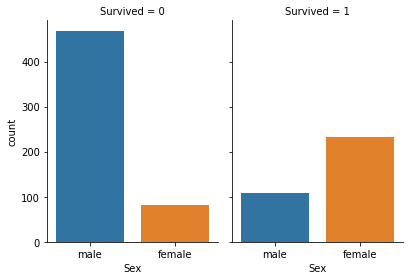

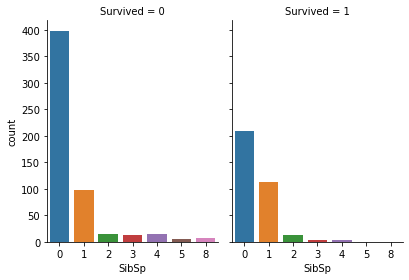

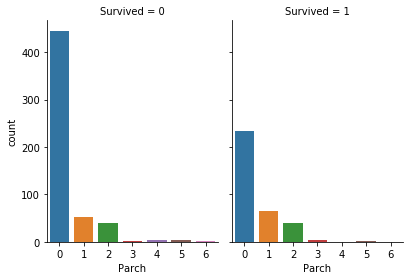

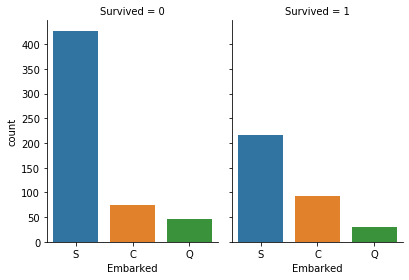

In [4]:
train_df

sns.catplot(x='Sex',  col="Survived",
                data = train_df, kind="count",
                height=4, aspect=.7)

sns.catplot(x='SibSp',  col="Survived",
                data = train_df, kind="count",
                height=4, aspect=.7)

sns.catplot(x='Parch',  col="Survived",
                data = train_df, kind="count",
                height=4, aspect=.7)

sns.catplot(x='Embarked',  col="Survived",
                data = train_df, kind="count",
                height=4, aspect=.7)

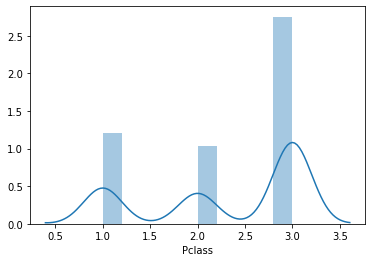

In [5]:
sns.distplot(train_df['Pclass'])

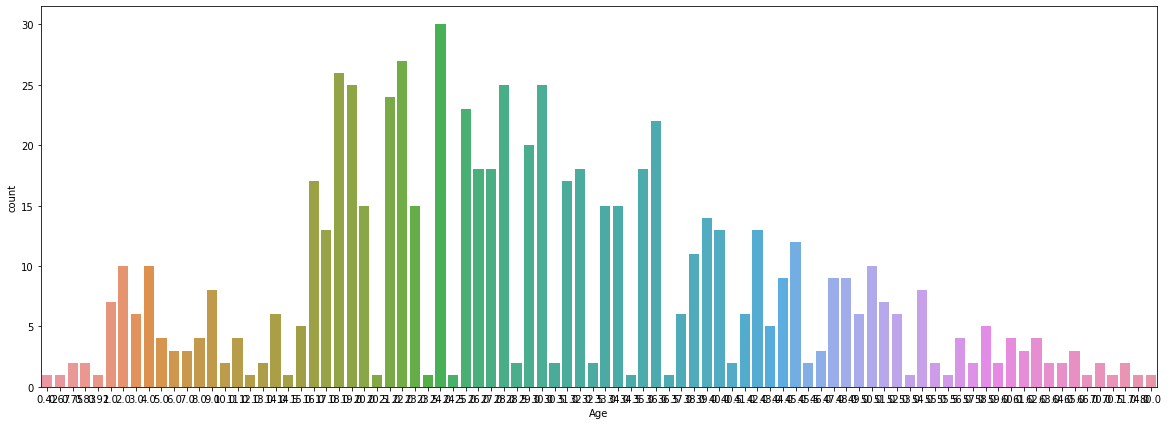

In [551]:
plt.figure(figsize=(20,7))
sns.countplot(x=train_df['Age'],data=train_df)

In [552]:
#sns.scatterplot(x=train_df['Pclass'],y=train_df['Age'],data=train_df)

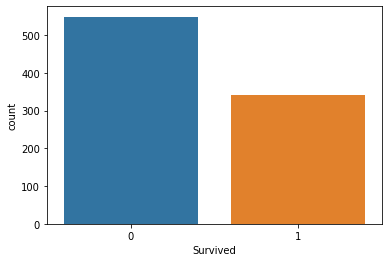

In [553]:
sns.countplot(train_df['Survived'])

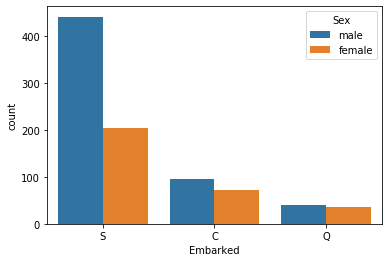

In [9]:
sns.countplot(train_df['Embarked'],hue=train_df['Sex'])

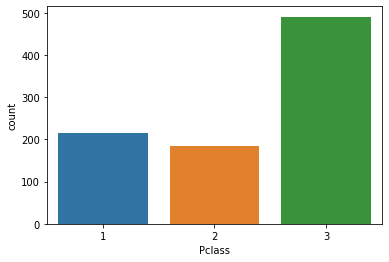

In [498]:
sns.countplot(train_df['Pclass'])

In [555]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [188]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [56]:
#class_1 = train_df.groupby(['Pclass'])['Age'].mean()

In [798]:
train_df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

## There are 177 null values in Age column. Lets the put the mean age value of that corresponding Pclass type

In [277]:
class1_age = train_df[train_df['Pclass'] == 1]['Age'].mean()
class2_age = train_df[train_df['Pclass'] == 2]['Age'].mean()
class3_age = train_df[train_df['Pclass'] == 3]['Age'].mean()

In [278]:
class1_age,class2_age,class3_age

(38.233440860215055, 29.87763005780347, 25.14061971830986)

#### Defining a fucntio replace the NaN values to the mean Age for corresponding Pclass

In [279]:
def replace_nan_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age    

In [62]:
index_nan_age = list(train_df['Age'][train_df['Age'].isna()].index)
index_nan_age

[5,
 17,
 19,
 26,
 28,
 29,
 31,
 32,
 36,
 42,
 45,
 46,
 47,
 48,
 55,
 64,
 65,
 76,
 77,
 82,
 87,
 95,
 101,
 107,
 109,
 121,
 126,
 128,
 140,
 154,
 158,
 159,
 166,
 168,
 176,
 180,
 181,
 185,
 186,
 196,
 198,
 201,
 214,
 223,
 229,
 235,
 240,
 241,
 250,
 256,
 260,
 264,
 270,
 274,
 277,
 284,
 295,
 298,
 300,
 301,
 303,
 304,
 306,
 324,
 330,
 334,
 335,
 347,
 351,
 354,
 358,
 359,
 364,
 367,
 368,
 375,
 384,
 388,
 409,
 410,
 411,
 413,
 415,
 420,
 425,
 428,
 431,
 444,
 451,
 454,
 457,
 459,
 464,
 466,
 468,
 470,
 475,
 481,
 485,
 490,
 495,
 497,
 502,
 507,
 511,
 517,
 522,
 524,
 527,
 531,
 533,
 538,
 547,
 552,
 557,
 560,
 563,
 564,
 568,
 573,
 578,
 584,
 589,
 593,
 596,
 598,
 601,
 602,
 611,
 612,
 613,
 629,
 633,
 639,
 643,
 648,
 650,
 653,
 656,
 667,
 669,
 674,
 680,
 692,
 697,
 709,
 711,
 718,
 727,
 732,
 738,
 739,
 740,
 760,
 766,
 768,
 773,
 776,
 778,
 783,
 790,
 792,
 793,
 815,
 825,
 826,
 828,
 832,
 837,
 839,
 84

In [53]:
list(train_df['Age'][train_df['Age'].isna()].index)

[]

In [63]:
for i in index_nan_age:
    #print(train_df.iloc[i]['Age'])
    train_df['Age'].iloc[i] = train_df['Age'][(train_df.iloc[i]['Pclass'] == train_df['Pclass']) & (train_df.iloc[i]['SibSp'] == train_df['SibSp']) & 
                              (train_df.iloc[i]['Parch'] == train_df['Parch'])].median()

In [64]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [65]:
train_df[train_df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Replacing the NAN values of Age column with the mean Age value of that Pclass value.

In [280]:
#train_df['Age'] = train_df[['Age','Pclass']].apply(replace_nan_age,axis=1)

In [66]:
train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1})

In [59]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [283]:
train_df['Embarked'].isna().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [284]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [285]:
train_df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [67]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

## There are only two rows which has NAN value in Embarked column that makes 0.22% of the entire test dataset,so droping those two rows

## Creatin the dummy values for the categories in the columns Sex and Embarked

In [68]:
train_df = pd.get_dummies(train_df, columns = ["Embarked"], prefix="Em")
train_df = pd.get_dummies(train_df, columns = ["Pclass"], prefix="Pc")

In [58]:
#train_df['Embarked'] = train_df['Embarked'].map({'S':0,'C':1,'Q':2})

## Here we will be using only 1 column as Male column here 1-> Male and 0-> Female

In [72]:
train_df['Cabin'] = train_df['Cabin'].fillna('X')
train_df['Cabin'] = train_df['Cabin'].str[0]
train_df = pd.get_dummies(train_df, columns = ["Cabin"],prefix="Cabin")

In [78]:
def map_ticket(data):
    #print(data.count())
    #for i in range(1, data.count()):
    if data in ticket_series.index:
            #print(data[i])
        return ticket_series.loc[data]

In [79]:
ticket_series = train_df['Ticket'].value_counts()

In [80]:
train_df['Ticket'] = train_df['Ticket'].apply(map_ticket)

In [82]:
train_df = pd.get_dummies(train_df, columns = ["Ticket"],prefix="TK")

In [84]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [86]:
train_df['Single'] = train_df['Fsize'].map(lambda s: 1 if s == 1 else 0)
train_df['SmallF'] = train_df['Fsize'].map(lambda s: 1 if  s == 2  else 0)
train_df['MedF'] = train_df['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train_df['LargeF'] = train_df['Fsize'].map(lambda s: 1 if s >= 5 else 0)

In [ ]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.')

In [ ]:
train_df['Title'] = train_df['Title'].replace(['Dr','Rev','Col','Mlle','Major','Countess','Capt','Jonkheer','Don',],'Rare')
train_df['Title'] = train_df['Title'].replace(['Mme','Ms'],'Miss')
train_df['Title'] = train_df['Title'].replace(['Lady'],'Mrs')
train_df['Title'] = train_df['Title'].replace(['Sir'],'Mr')

In [94]:
train_df = pd.get_dummies(train_df, columns = ["Title"])

In [99]:
train_df.drop(['PassengerId'],inplace=True,axis=1)

In [156]:
train_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S,Pc_1,...,Fsize,Single,SmallF,MedF,LargeF,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,22.0,1,0,7.2500,0,0,1,0,...,2,0,1,0,0,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,...,2,0,1,0,0,0,0,0,1,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,...,2,0,1,0,0,0,0,0,1,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = train_df.drop(['Survived'],axis=1)
y = train_df['Survived']

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logmodel = LogisticRegression()
logmodel.fit(X,y)

C:\Users\mayoor09\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
test_df = pd.read_csv('test.csv')
test_df['Cabin'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Cabin, dtype: object

In [131]:
index_nan_age_test = list(test_df['Age'][test_df['Age'].isna()].index)
index_nan_age_test

[10,
 22,
 29,
 33,
 36,
 39,
 41,
 47,
 54,
 58,
 65,
 76,
 83,
 84,
 85,
 88,
 91,
 93,
 102,
 107,
 108,
 111,
 116,
 121,
 124,
 127,
 132,
 133,
 146,
 148,
 151,
 160,
 163,
 168,
 170,
 173,
 183,
 188,
 191,
 199,
 200,
 205,
 211,
 216,
 219,
 225,
 227,
 233,
 243,
 244,
 249,
 255,
 256,
 265,
 266,
 267,
 268,
 271,
 273,
 274,
 282,
 286,
 288,
 289,
 290,
 292,
 297,
 301,
 304,
 312,
 332,
 339,
 342,
 344,
 357,
 358,
 365,
 366,
 380,
 382,
 384,
 408,
 410,
 413,
 416,
 417]

In [132]:
for i in index_nan_age_test:
    #print(train_df.iloc[i]['Age'])
    test_df['Age'].iloc[i] = test_df['Age'][(test_df.iloc[i]['Pclass'] == test_df['Pclass']) & (test_df.iloc[i]['SibSp'] == test_df['SibSp']) & 
                              (test_df.iloc[i]['Parch'] == test_df['Parch'])].median()

In [133]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [134]:
test_df[test_df['Age'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [135]:
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1})

In [136]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [138]:
test_df['Embarked'] = test_df['Embarked'].fillna('S')

In [140]:
test_df = pd.get_dummies(test_df, columns = ["Embarked"], prefix="Em")
test_df = pd.get_dummies(test_df, columns = ["Pclass"], prefix="Pc")

In [141]:
test_df['Cabin'] = test_df['Cabin'].fillna('X')
test_df['Cabin'] = test_df['Cabin'].str[0]
test_df = pd.get_dummies(test_df, columns = ["Cabin"],prefix="Cabin")

In [142]:
def map_ticket(data):
    #print(data.count())
    #for i in range(1, data.count()):
    if data in ticket_series_test.index:
            #print(data[i])
        return ticket_series_test.loc[data]

In [145]:
ticket_series_test = test_df['Ticket'].value_counts()

In [146]:
test_df['Ticket'] = test_df['Ticket'].apply(map_ticket)

In [147]:
test_df = pd.get_dummies(test_df, columns = ["Ticket"],prefix="TK")

In [148]:
test_df["Fsize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [163]:
test_df['Single'] = test_df['Fsize'].map(lambda s: 1 if s == 1 else 0)
test_df['SmallF'] = test_df['Fsize'].map(lambda s: 1 if  s == 2  else 0)
test_df['MedF'] = test_df['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test_df['LargeF'] = test_df['Fsize'].map(lambda s: 1 if s >= 5 else 0)

In [150]:
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.')

In [151]:
test_df['Title'] = test_df['Title'].replace(['Dr','Rev','Col','Mlle','Major','Countess','Capt','Jonkheer','Don',],'Rare')
test_df['Title'] = test_df['Title'].replace(['Mme','Ms'],'Miss')
test_df['Title'] = test_df['Title'].replace(['Lady'],'Mrs')
test_df['Title'] = test_df['Title'].replace(['Sir'],'Mr')

In [154]:
test_df = pd.get_dummies(test_df, columns = ["Title"])

In [161]:
test_df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [164]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S,Pc_1,Pc_2,...,Title_Dona,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Single,SmallF,MedF,LargeF
0,0,34.5,0,0,7.8292,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,47.0,1,0,7.0000,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,62.0,0,0,9.6875,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,0,27.0,0,0,8.6625,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,22.0,1,1,12.2875,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [168]:
train_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S,Pc_1,...,Fsize,Single,SmallF,MedF,LargeF,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,22.0,1,0,7.2500,0,0,1,0,...,2,0,1,0,0,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,...,2,0,1,0,0,0,0,0,1,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,...,2,0,1,0,0,0,0,0,1,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0


In [172]:
test_df.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Em_C', 'Em_Q', 'Em_S', 'Pc_1',
       'Pc_2', 'Pc_3', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_X', 'TK_1', 'TK_2', 'TK_3', 'TK_4', 'TK_5',
       'Fsize', 'Title_Dona', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Single', 'SmallF', 'MedF', 'LargeF'],
      dtype='object')

In [171]:
train_df.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Em_C', 'Em_Q',
       'Em_S', 'Pc_1', 'Pc_2', 'Pc_3', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X',
       'TK_1', 'TK_2', 'TK_3', 'TK_4', 'TK_5', 'TK_6', 'TK_7', 'Fsize',
       'Single', 'SmallF', 'MedF', 'LargeF', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [157]:
X_test = test_df.drop('Survived',axis=1)

KeyError: "['Survived'] not found in axis"

In [ ]:
predictions = logmodel.predict(X_test)

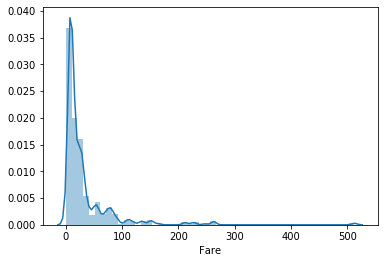

In [33]:
sns.distplot(train_df['Fare'])

In [34]:
pd.qcut(train_df['Fare'], 4).value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare, dtype: int64

In [297]:
def map_fare(fare):
    if fare <= 7.90:
        return 0
    elif (fare > 7.90) & (fare <=14.45):
        return 1
    elif (fare > 14.45) & (fare <=31.0):
        return 2
    elif (fare > 31.0) & (fare <=512.33):
        return 3

In [298]:
train_df['Fare'] = train_df['Fare'].apply(map_fare)

In [299]:
train_df['Fare'].isnull().sum()

0

In [300]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,8,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,1,8,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,8,0


In [301]:
pd.qcut(train_df['Age'],4).value_counts()

(0.419, 22.0]    231
(22.0, 26.0]     224
(37.0, 80.0]     218
(26.0, 37.0]     218
Name: Age, dtype: int64

In [302]:
def map_age(age):
    if age < 22.0:
        return 0
    elif (age >= 22) & (age <=26):
        return 1
    elif (age > 26) & (age <=37):
        return 2
    elif (age > 37):
        return 3

In [303]:
train_df['Age'] = train_df['Age'].apply(map_age)

In [306]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,8,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,3,2,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,8,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,8,0,Mr


In [89]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Lady          1
Mme           1
Sir           1
Ms            1
Jonkheer      1
Don           1
Capt          1
Name: Title, dtype: int64

In [92]:
train_df['Title'].value_counts()

Mr        518
Miss      184
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [317]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

In [318]:
train_df['Title'] = train_df['Title'].map(titles)

In [321]:
train_df.drop('Name',axis=1,inplace=True)

In [97]:
#train_df['Cabin'] = train_df['Cabin'].fillna('U')

In [99]:
#train_df['Cabin'] = train_df['Cabin'].str[0]

In [264]:
#train_df['Cabin'].value_counts()

In [102]:
#deck_map = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7,'U':8}

In [265]:
#train_df['Cabin'] = train_df['Cabin'].map(deck_map)

In [326]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,1,0,8,0,1
1,2,1,1,1,3,1,0,1,3,2,1,3
2,3,1,3,1,1,0,0,1,1,8,0,2
3,4,1,1,1,2,1,0,2,3,2,0,3
4,5,0,3,0,2,0,0,1,1,8,0,1


## Lets try to find out the relation for Name,Ticket,Cabin column with Servived column

#### Name column is the name of the passanger, we can categorise it based on the prefix i.e. Mr,Mrs,Miss but we already have the Sex  and SibSp,Parch colunns which defines the gender and relationship between the passangers.
#### We can drop the Name column

#### Also we have put the dummies for the Sex,Embarked columns so we can drop them as well

In [223]:
#train_df.head()

In [224]:
#train_df['Ticket'].head(10)

In [225]:
#train_df['Ticket'].unique()

#### Ticket number here seems to be some multiple random values. It doesnt show any relation with the Servived column or any other column from the datset.

#### Dropping the Ticket column as well

In [664]:
#train_df.drop('Ticket',axis=1,inplace=True)

In [665]:
#train_df.drop('Cabin',axis=1,inplace=True)

In [226]:
#train_df.head()

### Checking for NaN values if any in the dataframe

In [899]:
#train_df['Fare'].isnull().value_counts()

False    891
Name: Fare, dtype: int64

In [900]:
#train_df[train_df['C'].isna()]

In [669]:
#train_df.dropna(inplace=True)

In [124]:
train_df['Title'].value_counts()

1.0    519
2.0    184
3.0    125
4.0     40
5.0     23
Name: Title, dtype: int64

In [123]:
train_df['Title'] = train_df['Title'].fillna(1)

## This will be our final data set on which we will run the ML model to predict the values.

## Using train_test_split module to split the data into training data and testing data

In [327]:
from sklearn.model_selection import train_test_split

#### Here we are splitting the dataset into 70/30 percentage. 

In [904]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [905]:
X_train.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
575,3,0,0,0,0,2,0,8,1
838,3,0,2,0,0,3,0,8,1
337,1,1,3,0,0,3,1,4,2
523,1,1,3,0,1,3,1,1,3
863,3,1,1,8,2,3,0,8,2


In [906]:
y_train.head()

520    1
510    1
446    1
2      1
691    1
Name: Survived, dtype: int64

## Using Regression algorithm to create the prediction model

C:\Users\mayoor09\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [909]:
predictions = logmodel.predict(X_test)

## Generating a classification report to evaluate the model

In [910]:
from sklearn.metrics import classification_report

In [911]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       154
           1       0.80      0.71      0.75       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



## From the precision and accuracy  matrix above this looks to be the pretty good model.
## now lets run the model for the test data set.

In [168]:
test_df = pd.read_csv('test.csv')

In [169]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Performing the same set of feature engineering performed on test data

In [170]:
class1_age1 = test_df[test_df['Pclass'] == 1]['Age'].mean()
class2_age1 = test_df[test_df['Pclass'] == 2]['Age'].mean()
class3_age1 = test_df[test_df['Pclass'] == 3]['Age'].mean()

In [171]:
class1_age1,class2_age1,class3_age1

(40.91836734693877, 28.7775, 24.02794520547945)

In [172]:
def replace_nan_age1(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age 

In [173]:
test_df['Age'] = test_df[['Age','Pclass']].apply(replace_nan_age1,axis=1)

In [174]:
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1})

In [175]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",0,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",0,24.0,1,1,2668,22.3583,NaN,C


In [176]:
test_df['Embarked'] = test_df['Embarked'].fillna('S')

In [177]:
test_df['Embarked'] = test_df['Embarked'].map({'S':0,'C':1,'Q':2})

In [178]:
test_df['Cabin'] = test_df['Cabin'].fillna('U')

In [179]:
test_df['Cabin'] =  test_df['Cabin'].str[0]

In [180]:
deck_map = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7,'U':8}

In [181]:
test_df['Cabin'] = test_df['Cabin'].map(deck_map)

In [188]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0.0,8,2,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,0.0,8,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1.0,8,2,Mr
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,1.0,8,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1.0,8,0,Mrs


In [183]:
test_df['Fare'] = test_df['Fare'].apply(map_fare)

In [184]:
test_df['Age'] = test_df['Age'].apply(map_age)

In [185]:
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.')

In [186]:
test_df['Title'] = test_df['Title'].replace(['Dr','Rev','Col','Mlle','Major','Countess','Capt','Jonkheer','Don'],'Rare')

In [187]:
train_df['Title'] = train_df['Title'].replace(['Mme','Ms'],'Miss')
train_df['Title'] = train_df['Title'].replace(['lady'],'Mrs')
train_df['Title'] = train_df['Title'].replace(['Sir'],'Mr')

In [210]:
test_df['Title'] = test_df['Title'].map(titles)

In [189]:
test_df.drop('Name',axis=1,inplace=True)

In [190]:
#test_df.drop('Ticket',axis=1,inplace=True)

In [191]:
ticket_series = test_df['Ticket'].value_counts()

In [192]:
def map_ticket(data):
    #print(data.count())
    #for i in range(1, data.count()):
    if data in ticket_series.index:
            #print(data[i])
        return ticket_series.loc[data]

In [193]:
test_df['Ticket'] = test_df['Ticket'].apply(map_ticket)

In [194]:
#test_df['Ticket']

In [211]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2,0,0,1,0,8,2,1.0
1,893,3,1,3,1,0,1,0,8,0,3.0
2,894,2,0,3,0,0,1,1,8,2,1.0
3,895,3,0,2,0,0,1,1,8,0,1.0
4,896,3,1,1,1,1,1,1,8,0,3.0


In [200]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,0,3,0,0,1,NaN,8,0,Mr


In [201]:
test_df['Fare'].value_counts()

0.0    114
3.0    108
2.0    102
1.0     93
Name: Fare, dtype: int64

In [204]:
test_df['Fare'] = test_df['Fare'].fillna(0)

In [206]:
test_df['Fare'] = test_df['Fare'].astype(int)

In [214]:
test_df[test_df['Title'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
88,980,3,1,1,0,0,1,0,8,2,NaN
414,1306,1,1,3,0,0,1,3,2,1,NaN


In [215]:
test_df['Title'].value_counts()

1.0    240
2.0     78
3.0     72
4.0     21
5.0      5
Name: Title, dtype: int64

In [216]:
test_df['Title'] = test_df['Title'].fillna(5)

In [217]:
test_df['Title'] = test_df['Title'].astype(int)

In [218]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2,0,0,1,0,8,2,1
1,893,3,1,3,1,0,1,0,8,0,3
2,894,2,0,3,0,0,1,1,8,2,1
3,895,3,0,2,0,0,1,1,8,0,1
4,896,3,1,1,1,1,1,1,8,0,3


In [220]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
0,1,0,3,0,1,1,0,None,0,8,0,8,1.0
1,2,1,1,1,3,1,0,None,3,2,1,2,3.0
2,3,1,3,1,1,0,0,None,1,8,0,8,2.0
3,4,1,1,1,2,1,0,None,3,2,0,2,3.0
4,5,0,3,0,2,0,0,None,1,8,0,8,1.0


In [332]:
predictions = logmodel.predict(test_df.drop('PassengerId',axis=1))

In [333]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [334]:
final_pred = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})

In [336]:
final_pred.to_csv("titanic_pred_subm.csv")

In [993]:
logmodel.score(X, y)
#acc_logistic_reg = round(logmodel.score(X, y)*100, 2)

0.813692480359147

In [992]:
acc_logistic_reg

81.37

In [991]:
print ("Scores: ",scores)
print ("Mean: ", scores.mean())
print ("Standard Deviation: ", scores.std())

Scores:  [0.82222222 0.8        0.7752809  0.87640449 0.83146067 0.79775281
 0.80898876 0.79775281 0.82022472 0.79545455]
Mean:  0.8125541936216093
Standard Deviation:  0.026223657563067184


In [978]:
from sklearn.metrics import classification_report

In [999]:
#print(classification_report(y,test_predictions))

In [1027]:
gender_df.count()

PassengerId    418
Survived       418
dtype: int64

In [1026]:
test_predictions.shape

(418,)

In [1031]:
final_pred = pd.DataFrame({'PassengerId': test_df_t.PassengerId, 'Survived': test_predictions})

In [1032]:
final_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [1033]:
submission = final_pred.to_csv("titanic_pred_subm.csv")

(94.28029719626169, 22.20210430107527, 12.459677880184334)

In [758]:
def replace_nan_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    if pd.isnull(Fare):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Fare 

In [759]:
test_df['Fare'] = test_df[['Fare','Pclass']].apply(replace_nan_fare,axis=1)

In [760]:
test_predictions = logmodel.predict(test_df)

In [761]:
test_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [762]:
pred_table = pd.DataFrame(test_predictions,test_df['PassengerId'])

In [763]:
pred_table.reset_index(inplace=True)
pred_table.rename(columns={0:'Survived'},inplace=True)

In [764]:
pred_table['Survived'].value_counts()

0    258
1    160
Name: Survived, dtype: int64

In [773]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [765]:
gender_df['Survived'].value_counts()

0    265
1    152
Name: Survived, dtype: int64

## Creating the classficatin report for the test dataset

In [766]:
from sklearn.metrics import classification_report

In [769]:
print(classification_report(gender_df['Survived'],pred_table['Survived']))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       266
           1       0.91      0.95      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



## From the precision and accuracy  matrix above this looks to be the pretty good model.

In [770]:
pred_table.count()

PassengerId    418
Survived       418
dtype: int64

In [772]:
pred_table.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [771]:
submission = pred_table.to_csv("titanic_pred_subm.csv")